# Hierarchy Operations

### Required operations

- [x] Find sub-folders - Find all the solution articles in the subtree (across all descendents till leaf)
- [x] Find parent folders
- [x] Find immediate parent
- [x] Find immediate children
- [x] Add a sub-folder at any hierarchy
- [ ] Find the size of nested level (graph length/tree height) to limit the hierarchy
- [ ] Support infinite levels (practically applicable levels _say 100_)
- [ ] Remove a folder from any place at hierarchy
- [ ] Delete all the subfolders

## Folder Hierarchy of People Space

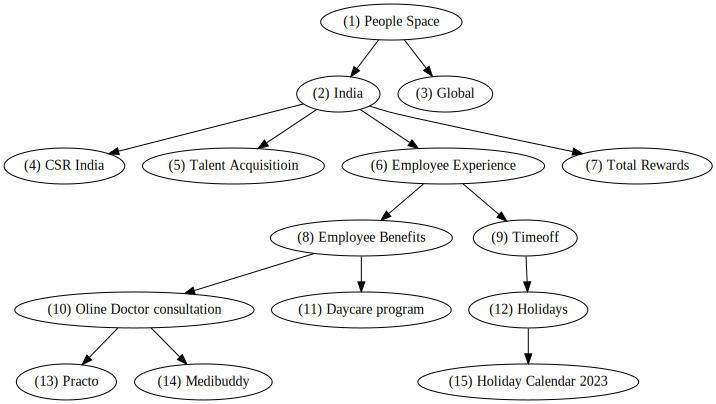

In [12]:
# import graph visualization
import graphviz

# define graph
folder_data = '''
digraph Folders {
    
    // Root folder 1 -

    ps [label="(1) People Space"]
    ind [label="(2) India"]
    glb [label="(3) Global"]
    csr [label="(4) CSR India"]
    ta [label="(5) Talent Acquisitioin"]
    ee [label="(6) Employee Experience"]
    tr [label="(7) Total Rewards"]
    eb [label="(8) Employee Benefits"]
    tof [label="(9) Timeoff"]
    odc [label="(10) Oline Doctor consultation"]
    dp [label="(11) Daycare program"]
    hol [label="(12) Holidays"]
    prc [label="(13) Practo"]
    mb [label="(14) Medibuddy"]
    hc [label="(15) Holiday Calendar 2023"]

    
    ps -> ind -> csr
    ps -> glb
    ind -> ta
    ind -> ee -> eb -> odc -> prc
    ind -> tr
    eb -> dp
    ee -> tof -> hol -> hc
    odc -> mb
    

    //Color codes
    # ps [color = red, fillcolor=pink, style=filled]
    # ind [color = blue, fillcolor=skyblue, style=filled]
    # ee [color = green, fillcolor=lightgreen, style=filled]
    # eb [color = purple, fillcolor=violet, style=filled]
    # tof [color = orange, fillcolor=yellow, style=filled]
}
'''
folders = graphviz.Source(folder_data)
folders


## Find sub-folders

### Find sub-folders of `Employee Experience`

```sql
SET @node_id = 6;
SELECT f.*, h.length from folders f JOIN hierarchy h ON f.id = h.child_id WHERE h.parent_id = @node_id ORDER BY length;
```

- Finds all the sub folders from the given folder (including the given one)
- Use cases:
  - Listing the folder chain
  - Can support loading all the hierarchy upto to leaf node (can show if we have enough real estate in UI)
  - Fetch all solutions article in the current tree (including sub folders)

### Result

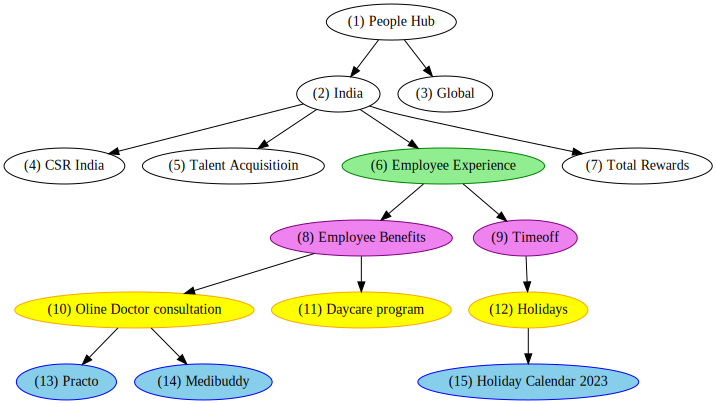

In [5]:
emp_exp = '''
digraph Folders {
    
    // Root folder 1 -
    
    ps [label="(1) People Space"]
    ind [label="(2) India"]
    glb [label="(3) Global"]
    csr [label="(4) CSR India"]
    ta [label="(5) Talent Acquisitioin"]
    ee [label="(6) Employee Experience"]
    tr [label="(7) Total Rewards"]
    eb [label="(8) Employee Benefits"]
    tof [label="(9) Timeoff"]
    odc [label="(10) Oline Doctor consultation"]
    dp [label="(11) Daycare program"]
    hol [label="(12) Holidays"]
    prc [label="(13) Practo"]
    mb [label="(14) Medibuddy"]
    hc [label="(15) Holiday Calendar 2023"]

    
    ps -> ind -> csr
    ps -> glb
    ind -> ta
    ind -> ee -> eb -> odc -> prc
    ind -> tr
    eb -> dp
    ee -> tof -> hol -> hc
    odc -> mb

    # ps [color = red, fillcolor=pink, style=filled]
    # ind [color = blue, fillcolor=skyblue, style=filled]
    ee [color = green, fillcolor=lightgreen, style=filled]
    eb [color = purple, fillcolor=violet, style=filled]
    tof [color = purple, fillcolor=violet, style=filled]
    odc [color = orange, fillcolor=yellow, style=filled]
    dp [color = orange, fillcolor=yellow, style=filled]
    hol [color = orange, fillcolor=yellow, style=filled]
    prc [color = blue, fillcolor=skyblue, style=filled]
    mb [color = blue, fillcolor=skyblue, style=filled]
    hc [color = blue, fillcolor=skyblue, style=filled]
}
'''
ee_sub = graphviz.Source(emp_exp)
ee_sub



| id | name | length |
| :--- | :--- | :--- |
| 6 | Employee Experience | 0 |
| 8 | Employee Benefits | 1 |
| 9 | Timeoff | 1 |
| 10 | Online Doctor Consultation | 2 |
| 11 | Daycare program | 2 |
| 12 | Holidays | 2 |
| 13 | Practo | 3 |
| 14 | Medibuddy | 3 |
| 15 | Holiday calendar 2023 | 3 |


## Find parent folders of `Employee Experience`


```sql
SET @node_id = 6;
SELECT f.*, h.length from folders f JOIN hierarchy h ON f.id = h.parent_id WHERE h.child_id = @node_id ORDER BY length DESC;
```

- Finds all the parent folder from current level all the way up to the root folder
- Use case: 
  - Breadcrumbs
  - When agent opens the solution article by id, we can expand the tree from current node to root (upwards)

### Result

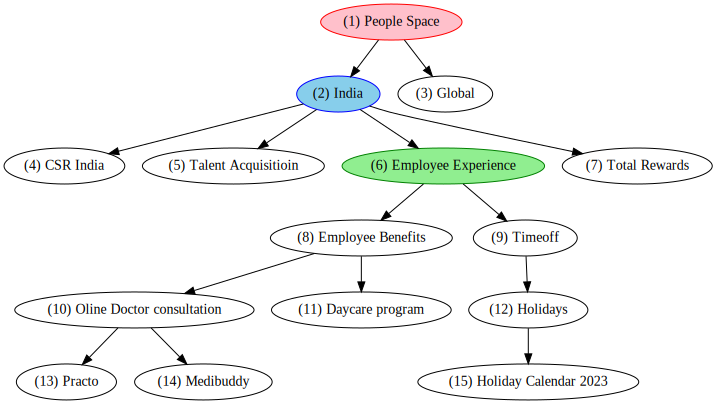

In [7]:
emp_exp1 = '''
digraph Folders {
    
    // Root folder 1 -
    
    ps [label="(1) People Space"]
    ind [label="(2) India"]
    glb [label="(3) Global"]
    csr [label="(4) CSR India"]
    ta [label="(5) Talent Acquisitioin"]
    ee [label="(6) Employee Experience"]
    tr [label="(7) Total Rewards"]
    eb [label="(8) Employee Benefits"]
    tof [label="(9) Timeoff"]
    odc [label="(10) Oline Doctor consultation"]
    dp [label="(11) Daycare program"]
    hol [label="(12) Holidays"]
    prc [label="(13) Practo"]
    mb [label="(14) Medibuddy"]
    hc [label="(15) Holiday Calendar 2023"]

    
    ps -> ind -> csr
    ps -> glb
    ind -> ta
    ind -> ee -> eb -> odc -> prc
    ind -> tr
    eb -> dp
    ee -> tof -> hol -> hc
    odc -> mb

    ps [color = red, fillcolor=pink, style=filled]
    ind [color = blue, fillcolor=skyblue, style=filled]
    ee [color = green, fillcolor=lightgreen, style=filled]
}
'''
ee_parent = graphviz.Source(emp_exp1)
ee_parent



| id | name | length |
| :--- | :--- | :--- |
| 1 | People Space | 2 |
| 2 | India | 1 |
| 6 | Employee Experience | 0 |


## Find immediate parent of `Employee Experience`


```sql
SET @node_id = 6;
SELECT f.*, h.length from folders f JOIN hierarchy h ON f.id = h.parent_id WHERE h.child_id = @node_id AND length = 1;
```

- Finds the immediate parent folder of current folder
- Use case: 
  - Link to go one level up

### Result

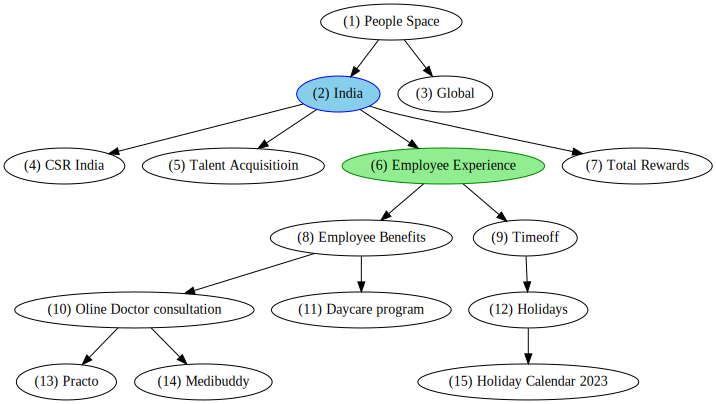

In [8]:
emp_exp2 = '''
digraph Folders {
    
    // Root folder 1 -
    
    ps [label="(1) People Space"]
    ind [label="(2) India"]
    glb [label="(3) Global"]
    csr [label="(4) CSR India"]
    ta [label="(5) Talent Acquisitioin"]
    ee [label="(6) Employee Experience"]
    tr [label="(7) Total Rewards"]
    eb [label="(8) Employee Benefits"]
    tof [label="(9) Timeoff"]
    odc [label="(10) Oline Doctor consultation"]
    dp [label="(11) Daycare program"]
    hol [label="(12) Holidays"]
    prc [label="(13) Practo"]
    mb [label="(14) Medibuddy"]
    hc [label="(15) Holiday Calendar 2023"]

    
    ps -> ind -> csr
    ps -> glb
    ind -> ta
    ind -> ee -> eb -> odc -> prc
    ind -> tr
    eb -> dp
    ee -> tof -> hol -> hc
    odc -> mb

    ind [color = blue, fillcolor=skyblue, style=filled]
    ee [color = green, fillcolor=lightgreen, style=filled]
}
'''
ee_immediate_parent = graphviz.Source(emp_exp2)
ee_immediate_parent

| id | name | length |
| :--- | :--- | :--- |
| 2 | India | 1 |


## Find immediate children folders of `India`


```sql
SET @node_id = 2;
SELECT f.*, h.length from folders f JOIN hierarchy h ON f.id = h.child_id WHERE h.parent_id = @node_id AND length = 1;
```

- Finds the immediate parent folder of current folder
- Use case: 
  - Link to go one level up

### Result

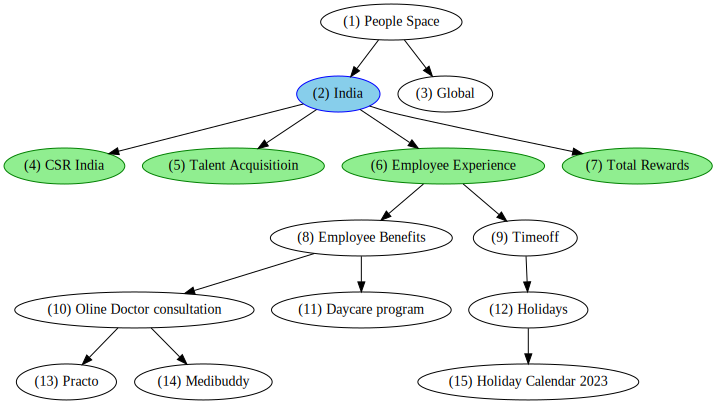

In [15]:
ind = '''
digraph Folders {
    
    // Root folder 1 -
    
    ps [label="(1) People Space"]
    ind [label="(2) India"]
    glb [label="(3) Global"]
    csr [label="(4) CSR India"]
    ta [label="(5) Talent Acquisitioin"]
    ee [label="(6) Employee Experience"]
    tr [label="(7) Total Rewards"]
    eb [label="(8) Employee Benefits"]
    tof [label="(9) Timeoff"]
    odc [label="(10) Oline Doctor consultation"]
    dp [label="(11) Daycare program"]
    hol [label="(12) Holidays"]
    prc [label="(13) Practo"]
    mb [label="(14) Medibuddy"]
    hc [label="(15) Holiday Calendar 2023"]

    
    ps -> ind -> csr
    ps -> glb
    ind -> ta
    ind -> ee -> eb -> odc -> prc
    ind -> tr
    eb -> dp
    ee -> tof -> hol -> hc
    odc -> mb

    ind [color = blue, fillcolor=skyblue, style=filled]
    csr [color = green, fillcolor=lightgreen, style=filled]
    ta [color = green, fillcolor=lightgreen, style=filled]
    ee [color = green, fillcolor=lightgreen, style=filled]
    tr [color = green, fillcolor=lightgreen, style=filled]
}
'''
ind_immediate_child = graphviz.Source(ind)
ind_immediate_child

| id | name | length |
| :--- | :--- | :--- |
| 4 | CSR India | 1 |
| 5 | Talent Acquisition | 1 |
| 6 | Employee Experience | 1 |
| 7 | Total Rewards | 1 |


## Add a sub-folder to `Employee Experience`

Create a new folder named `Future of Work` under `Employee Experience` with id `22`

Required params

- New folder id (after inserted) --`22`--
- immediate parent (folder under which we will insert this new folder --`6`--)

```sql
START TRANSACTION;
SET @new_node_id = 22;
SET @parent_id = 6;
# Create Folder
INSERT INTO folders (id, name) VALUES (22, 'Future of Work');
# Create hierarchy from the root folder
INSERT INTO hierarchy(parent_id, child_id, length)
SELECT parent_id, @new_node_id, (length + 1) AS length
FROM hierarchy
WHERE child_id = @parent_id
UNION
SELECT @new_node_id, @new_node_id, 0;
# commit transaction
COMMIT;
```

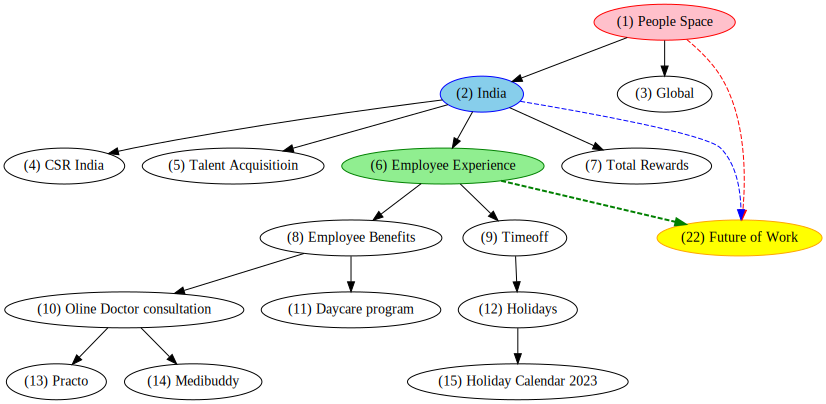

In [32]:
fow_parents = '''
digraph Folders {
    
    // Root folder 1 -
    
    ps [label="(1) People Space"]
    ind [label="(2) India"]
    glb [label="(3) Global"]
    csr [label="(4) CSR India"]
    ta [label="(5) Talent Acquisitioin"]
    ee [label="(6) Employee Experience"]
    tr [label="(7) Total Rewards"]
    eb [label="(8) Employee Benefits"]
    tof [label="(9) Timeoff"]
    odc [label="(10) Oline Doctor consultation"]
    dp [label="(11) Daycare program"]
    hol [label="(12) Holidays"]
    prc [label="(13) Practo"]
    mb [label="(14) Medibuddy"]
    hc [label="(15) Holiday Calendar 2023"]
    fow [label="(22) Future of Work"]

    
    ps -> ind -> csr
    ps -> glb
    ind -> ta
    ind -> ee -> eb -> odc -> prc
    ind -> tr
    eb -> dp
    ee -> tof -> hol -> hc
    odc -> mb
    ee -> fow [color=green, style="bold,dashed"]

    # All parents to new new node
    ps -> fow [color="red", style="dashed"]

    ind -> fow [color="blue", style="dashed"]

    ps [color = red, fillcolor=pink, style=filled]
    ind [color = blue, fillcolor=skyblue, style=filled]
    ee [color = green, fillcolor=lightgreen, style=filled]
    fow [color = orange, fillcolor=yellow, style=filled]
}
'''
fow_parent = graphviz.Source(fow_parents)
fow_parent

## Verify parent folders of `Future of Work`


```sql
@node_id = 22;
SELECT f.*, h.length from folders f JOIN hierarchy h ON f.id = h.parent_id WHERE h.child_id = @node_id ORDER BY length DESC;
```


### Result

| id | name | length |
| :--- | :--- | :--- |
| 1 | People Space | 3 |
| 2 | India | 2 |
| 6 | Employee Experience | 1 |
| 22 | Future of Work | 0 |


## Move Folders

Cases:
1. Move under Sibling -- Move `Employee Benefits` under `Future of Work`
2. Move under grand parent -- Move `Timeoff` under `India`
3. Move to another sub tree -- Move `Online Doctor consultation` under `Total Rewards`

### Case 1: Move Under Sibling

#### Move `Employee Benefits` under `Future of Work`

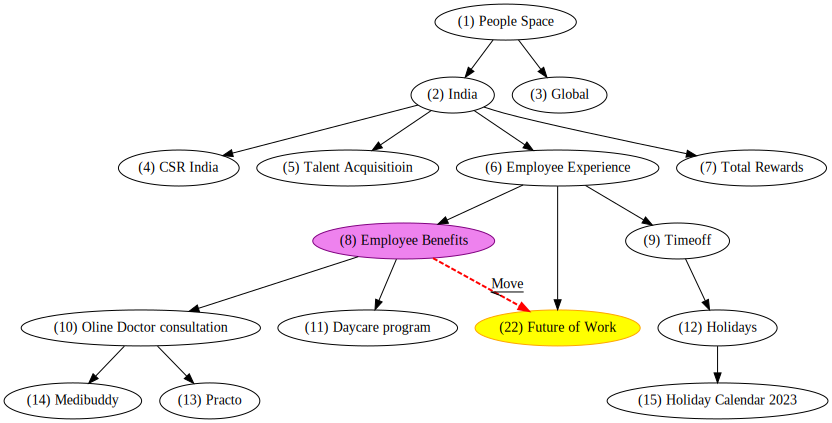

In [43]:
move_to_sibling = '''
digraph Folders {
    
    // Root folder 1 -
    
    ps [label="(1) People Space"]
    ind [label="(2) India"]
    glb [label="(3) Global"]
    csr [label="(4) CSR India"]
    ta [label="(5) Talent Acquisitioin"]
    ee [label="(6) Employee Experience"]
    tr [label="(7) Total Rewards"]
    eb [label="(8) Employee Benefits"]
    tof [label="(9) Timeoff"]
    odc [label="(10) Oline Doctor consultation"]
    dp [label="(11) Daycare program"]
    hol [label="(12) Holidays"]
    prc [label="(13) Practo"]
    mb [label="(14) Medibuddy"]
    hc [label="(15) Holiday Calendar 2023"]
    fow [label="(22) Future of Work"]

    
    ps -> ind -> csr
    ps -> glb
    ind -> ta
    ind -> ee -> eb -> odc -> prc
    ind -> tr
    eb -> dp
    ee -> tof -> hol -> hc
    odc -> mb
    ee -> fow

    fow [color = orange, fillcolor=yellow, style=filled]
    eb [color = purple, fillcolor=violet, style=filled]

    eb -> fow [label="Move" decorate=true, color=red, style="bold,dashed"]
}
'''
before_move = graphviz.Source(move_to_sibling)
before_move

```sql
START TRANSACTION;

SET @node_to_be_moved = 8; # Employee benefits
SET @new_location = 22; # Future of work

# Delete outdated paths of old location of subtree. At this point we get a new Tree with `@node_to_be_moved` as  new tree
DELETE parent
FROM hierarchy AS parent
         JOIN hierarchy AS child ON parent.child_id = child.child_id
         LEFT JOIN hierarchy AS x
                   ON x.parent_id = child.parent_id AND x.child_id = parent.parent_id
WHERE child.parent_id = @node_to_be_moved
  AND x.parent_id IS NULL;

# Add new paths
INSERT INTO hierarchy (parent_id, child_id, length)
SELECT supertree.parent_id, subtree.child_id,
       supertree.length+subtree.length+1
FROM hierarchy AS supertree JOIN hierarchy AS subtree
WHERE subtree.parent_id = @node_to_be_moved
  AND supertree.child_id = @new_location;

COMMIT;
```

### Result

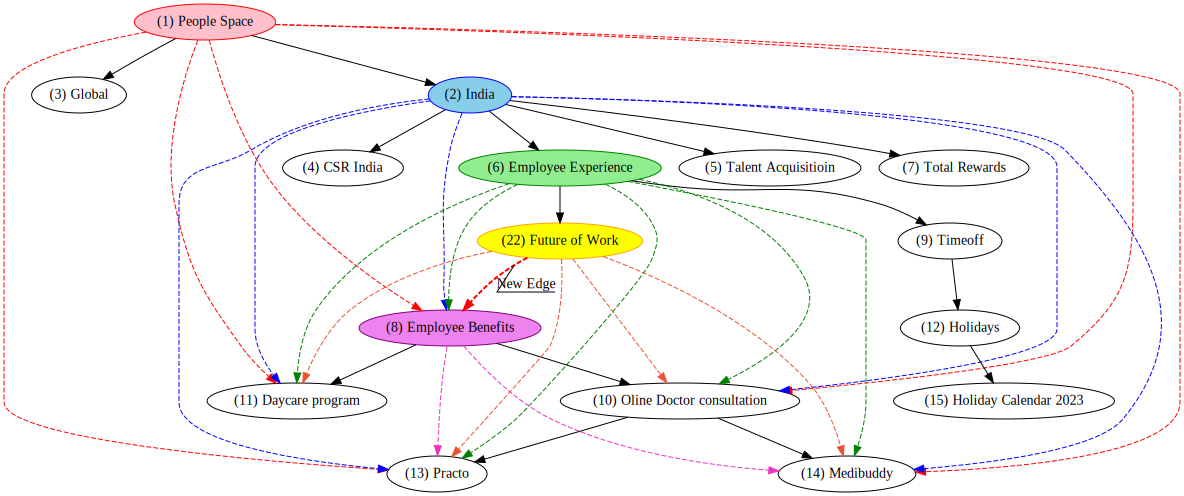

In [60]:
moved_to_sibling = '''
digraph Folders {
    
    // Root folder 1 -
    
    ps [label="(1) People Space"]
    ind [label="(2) India"]
    glb [label="(3) Global"]
    csr [label="(4) CSR India"]
    ta [label="(5) Talent Acquisitioin"]
    ee [label="(6) Employee Experience"]
    tr [label="(7) Total Rewards"]
    eb [label="(8) Employee Benefits"]
    tof [label="(9) Timeoff"]
    odc [label="(10) Oline Doctor consultation"]
    dp [label="(11) Daycare program"]
    hol [label="(12) Holidays"]
    prc [label="(13) Practo"]
    mb [label="(14) Medibuddy"]
    hc [label="(15) Holiday Calendar 2023"]
    fow [label="(22) Future of Work"]

    
    ps -> ind -> csr
    ps -> glb
    ind -> ta
    ind -> ee
    ind -> tr
    eb -> dp
    ee -> tof -> hol -> hc
    odc -> mb
    ee -> fow
    
    # new tree
    fow -> eb [label="New Edge" decorate=true, color=red, style="bold,dashed"]
    eb -> odc -> prc

    fow [color = orange, fillcolor=yellow, style=filled]
    eb [color = purple, fillcolor=violet, style=filled]

    ps [color = red, fillcolor=pink, style=filled]
    //Create Edge to all descendents from "People Space" to new tree
    ps -> eb [color="red", style="dashed"]
    ps -> odc [color="red", style="dashed"]
    ps -> prc [color="red", style="dashed"]
    ps -> dp [color="red", style="dashed"]
    ps -> mb [color="red", style="dashed"]

    //Create Edge to all descendents from "India" to new tree
    ind [color = blue, fillcolor=skyblue, style=filled]

    ind -> eb [color="blue", style="dashed"]
    ind -> odc [color="blue", style="dashed"]
    ind -> dp [color="blue", style="dashed"]
    ind -> prc [color="blue", style="dashed"]
    ind -> mb [color="blue", style="dashed"]

    //Create Edge to all descendents from "Employee Experience" to new tree
    ee [color = green, fillcolor=lightgreen, style=filled]

    ee -> eb [color="green", style="dashed"]
    ee -> odc [color="green", style="dashed"]
    ee -> dp [color="green", style="dashed"]
    ee -> prc [color="green", style="dashed"]
    ee -> mb [color="green", style="dashed"]

    //Create Edge to all descendents from "Future of Work" to new tree

    fow -> odc [color="#eb5234", style="dashed"]
    fow -> dp [color="#eb5234", style="dashed"]
    fow -> prc [color="#eb5234", style="dashed"]
    fow -> mb [color="#eb5234", style="dashed"]

    //Create Edge to all descendents from "Employee benefits" to new tree

    eb -> prc [color="#eb34c3", style="dashed"]
    eb -> mb [color="#eb34c3", style="dashed"]


}
'''
after_move = graphviz.Source(moved_to_sibling)
after_move

### Verify parent folders of `Employee Benefits`


```sql
SET @node_id = 8;
SELECT f.*, h.length from folders f JOIN hierarchy h ON f.id = h.parent_id WHERE h.child_id = @node_id ORDER BY length DESC;
```

| id | name | length |
| :--- | :--- | :--- |
| 1 | People Space | 4 |
| 2 | India | 3 |
| 6 | Employee Experience | 2 |
| 22 | Future of Work | 1 |
| 8 | Employee Benefits | 0 |



### Verify sub folders of `Employee Benefits`

```sql
SET @node_id = 8;
SELECT f.*, h.length from folders f JOIN hierarchy h ON f.id = h.child_id WHERE h.parent_id = @node_id ORDER BY length;
```

| id | name | length |
| :--- | :--- | :--- |
| 8 | Employee Benefits | 0 |
| 10 | Online Doctor Consultation | 1 |
| 11 | Daycare program | 1 |
| 13 | Practo | 2 |
| 14 | Medibuddy | 2 |

### Case 2: Move Under Grand Parent

#### Move `Timeoff` under `India`

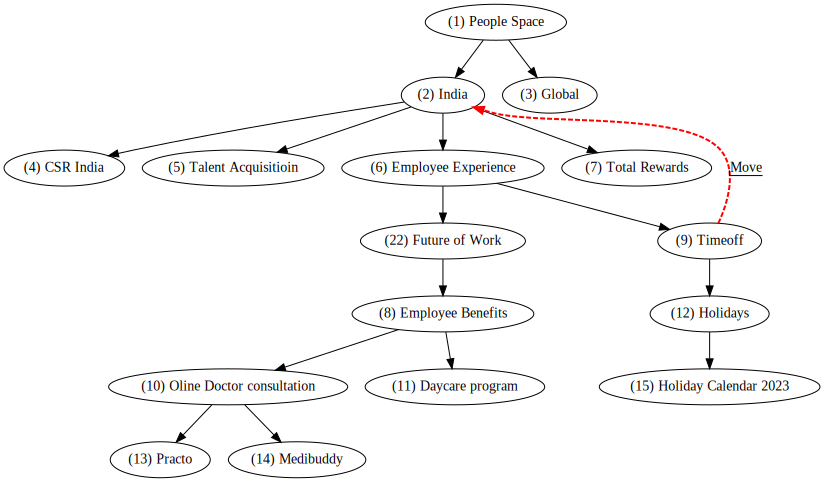

In [66]:
move_to_grandparent = '''
digraph Folders {
    
    // Root folder 1 -
    
    ps [label="(1) People Space"]
    ind [label="(2) India"]
    glb [label="(3) Global"]
    csr [label="(4) CSR India"]
    ta [label="(5) Talent Acquisitioin"]
    ee [label="(6) Employee Experience"]
    tr [label="(7) Total Rewards"]
    eb [label="(8) Employee Benefits"]
    tof [label="(9) Timeoff"]
    odc [label="(10) Oline Doctor consultation"]
    dp [label="(11) Daycare program"]
    hol [label="(12) Holidays"]
    prc [label="(13) Practo"]
    mb [label="(14) Medibuddy"]
    hc [label="(15) Holiday Calendar 2023"]
    fow [label="(22) Future of Work"]

    
    ps -> ind -> csr
    ps -> glb
    ind -> ta
    ind -> ee
    ind -> tr
    eb -> dp
    ee -> tof -> hol -> hc
    odc -> mb
    ee -> fow
    
    # new tree
    fow -> eb
    eb -> odc -> prc

    tof -> ind [label="Move" decorate=true, color=red, style="bold,dashed"]

}
'''
before_gp_move = graphviz.Source(move_to_grandparent)
before_gp_move

```sql
START TRANSACTION;

SET @node_to_be_moved = 9; # Timeoff
SET @new_location = 2; # India

# Delete outdated paths of old location of subtree. At this point we get a new Tree with `@node_to_be_moved` as  new tree
DELETE parent
FROM hierarchy AS parent
         JOIN hierarchy AS child ON parent.child_id = child.child_id
         LEFT JOIN hierarchy AS x
                   ON x.parent_id = child.parent_id AND x.child_id = parent.parent_id
WHERE child.parent_id = @node_to_be_moved
  AND x.parent_id IS NULL;

# Add new paths
INSERT INTO hierarchy (parent_id, child_id, length)
SELECT supertree.parent_id, subtree.child_id,
       supertree.length+subtree.length+1
FROM hierarchy AS supertree JOIN hierarchy AS subtree
WHERE subtree.parent_id = @node_to_be_moved
  AND supertree.child_id = @new_location;

COMMIT;
```

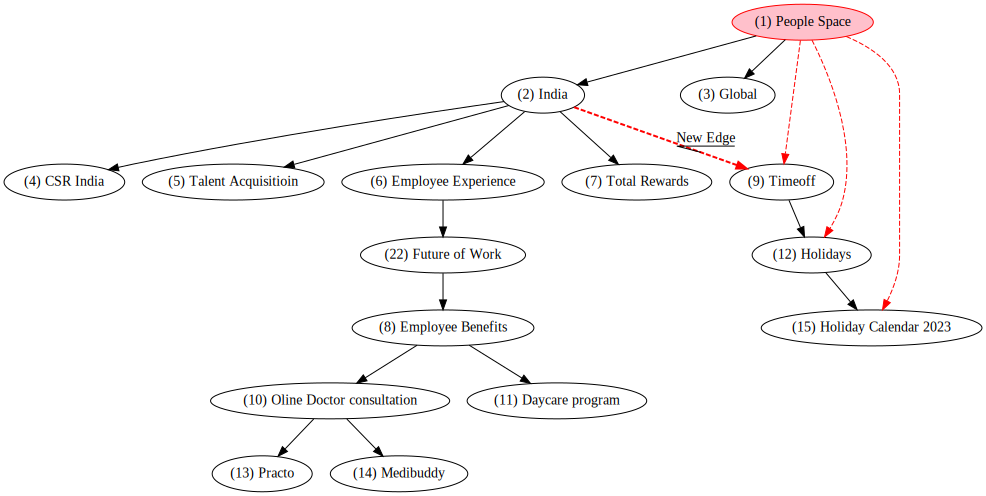

In [72]:
move_to_grandparent = '''
digraph Folders {
    
    // Root folder 1 -
    
    ps [label="(1) People Space"]
    ind [label="(2) India"]
    glb [label="(3) Global"]
    csr [label="(4) CSR India"]
    ta [label="(5) Talent Acquisitioin"]
    ee [label="(6) Employee Experience"]
    tr [label="(7) Total Rewards"]
    eb [label="(8) Employee Benefits"]
    tof [label="(9) Timeoff"]
    odc [label="(10) Oline Doctor consultation"]
    dp [label="(11) Daycare program"]
    hol [label="(12) Holidays"]
    prc [label="(13) Practo"]
    mb [label="(14) Medibuddy"]
    hc [label="(15) Holiday Calendar 2023"]
    fow [label="(22) Future of Work"]

    
    ps -> ind -> csr
    ps -> glb
    ind -> ta
    ind -> ee
    ind -> tr
    eb -> dp
    odc -> mb
    ee -> fow
    fow -> eb
    eb -> odc -> prc

    # new tree
    tof -> hol -> hc
    ind -> tof [label="New Edge" decorate=true, color=red, style="bold,dashed"]

    ps [color = red, fillcolor=pink, style=filled]
    //Create Edge to all descendents from "People Space" to new tree
    ps -> tof [color="red", style="dashed"]
    ps -> hol [color="red", style="dashed"]
    ps -> hc [color="red", style="dashed"]

}
'''
after_gp_move = graphviz.Source(move_to_grandparent)
after_gp_move

### Verify parent folders of `Timeoff`

```sql
SET @node_id = 9;
SELECT f.*, h.length from folders f JOIN hierarchy h ON f.id = h.parent_id WHERE h.child_id = @node_id ORDER BY length DESC;
```

| id | name | length |
| :--- | :--- | :--- |
| 1 | People Space | 2 |
| 2 | India | 1 |
| 9 | Timeoff | 0 |


### Verify sub folders of `Timeoff`

```sql
SET @node_id = 9;
SELECT f.*, h.length from folders f JOIN hierarchy h ON f.id = h.child_id WHERE h.parent_id = @node_id ORDER BY length;
```

| id | name | length |
| :--- | :--- | :--- |
| 9 | Timeoff | 0 |
| 12 | Holidays | 1 |
| 15 | Holiday calendar 2023 | 2 |
